In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource

In [2]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [3]:
n_qubits = 2
D = 101
betas_res = 2
gammas_res = 2
betas = np.linspace(0,np.pi,betas_res)
gammas = np.linspace(0,2*np.pi,gammas_res)
averages = np.zeros((betas_res,gammas_res),np.longdouble)
for b in range(betas_res):
    for g in range(gammas_res):
        n = b * gammas_res + g
        filename = str(n) + ".txt"
        real = np.genfromtxt("C:/dev/Multicqw/data/states/batch_coins/"+filename, usecols = 0, delimiter=",", dtype = np.longdouble)
        imag = np.genfromtxt("C:/dev/Multicqw/data/states/batch_coins/"+filename, usecols = 1, delimiter=",", dtype = np.longdouble)
        T = round((real.size)/(D*2*2))
        state = np.reshape(real + imag * (1.0j),(T,D,2,2))
        concurrences = np.sum(np.absolute(2 * (state[:,:,1,1]*state[:,:,0,0] - state[:,:,1,0]*state[:,:,0,1])),axis=1)
        averages[b,g] = np.average(concurrences)

Text(0, 35, '(b)')

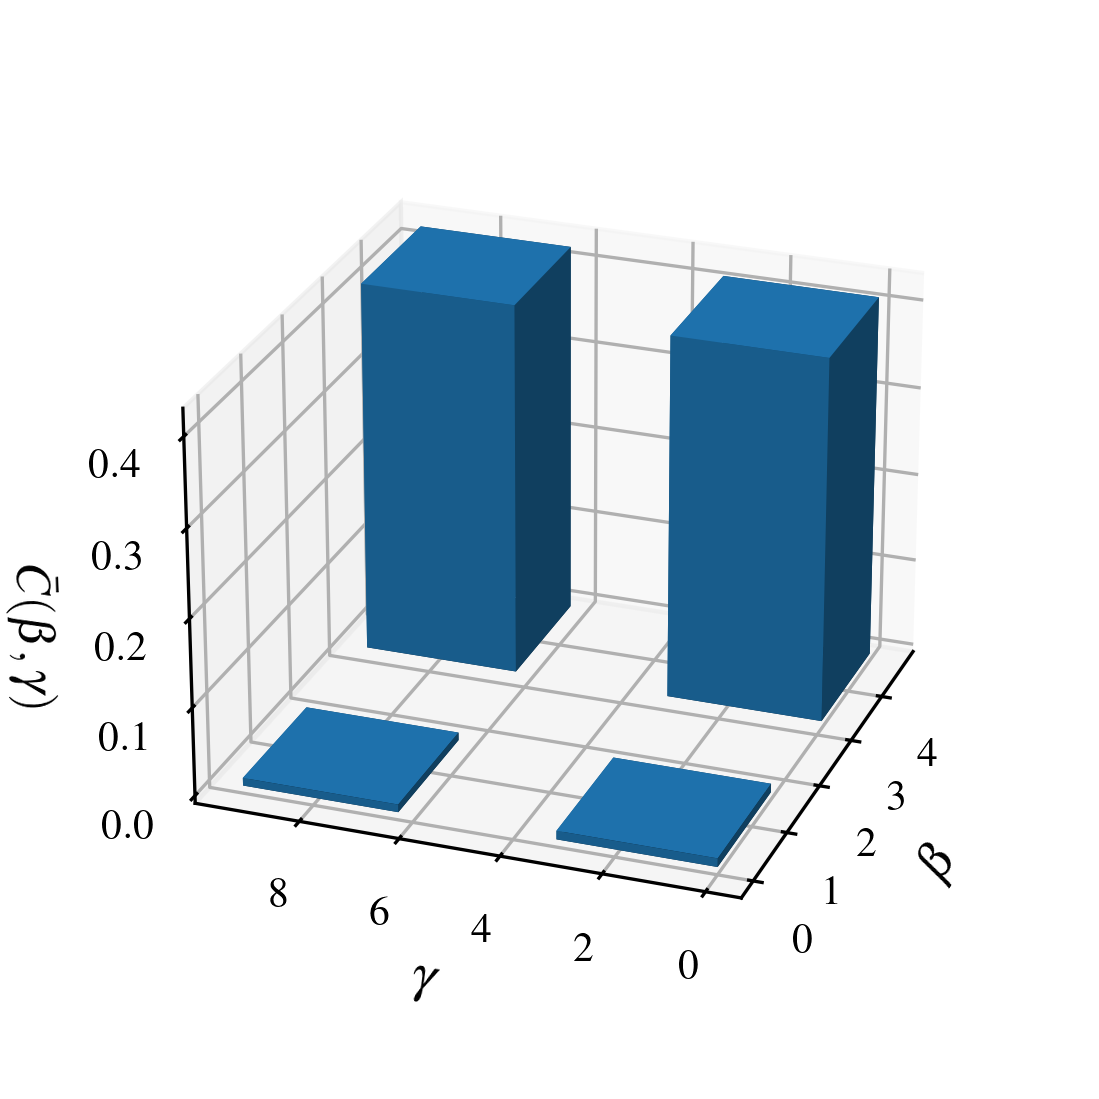

In [4]:
_xx, _yy = np.meshgrid(betas, gammas)
x, y = _xx.ravel(), _yy.ravel()
width = np.max(betas)/betas_res
depth = np.max(gammas)/gammas_res
light = LightSource(azdeg=315,altdeg=60)
fig = plt.figure(figsize=(6,4.5),dpi=300)
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=25,azim=-160,roll=0)
ax.set_xlabel(r'$\beta$',fontsize=12)
ax.set_ylabel(r'$\gamma$',fontsize=12)
ax.set_zlabel(r'$\bar{C}(\beta,\gamma)$',fontsize=12)
ax.set_box_aspect(None, zoom=0.85)
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5
ax.zaxis.labelpad = 5
ax.bar3d(x,y,0,width,depth,averages.flatten('F'),lightsource=light)
ax.text(0,35,0.03, '(b)', horizontalalignment='center', verticalalignment='center', fontsize=12)